# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import functools
import collections
from fastcore.basics import patch

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int,r:float, d:int=2):
        self.n = n
        self.r = r
        self.points = np.random.default_rng().random((n,d))
    
    @functools.cached_property
    def distance_matrix(self):
        a = self.points
        diff = a[:,None,:] - a[None,:,:]
        return np.linalg.norm(diff,axis=-1)

    @functools.cached_property
    def adj(self):
        mask = self.distance_matrix < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}
    


In [ ]:
rgg = RGG(100,0.1)
rgg.distance_matrix

array([[0.        , 0.26566256, 0.18233356, ..., 0.81920378, 0.69235232,
        0.60931337],
       [0.26566256, 0.        , 0.19004963, ..., 0.5839385 , 0.49755712,
        0.42450868],
       [0.18233356, 0.19004963, 0.        , ..., 0.77176075, 0.51450196,
        0.61043076],
       ...,
       [0.81920378, 0.5839385 , 0.77176075, ..., 0.        , 0.73789564,
        0.26458941],
       [0.69235232, 0.49755712, 0.51450196, ..., 0.73789564, 0.        ,
        0.75710479],
       [0.60931337, 0.42450868, 0.61043076, ..., 0.26458941, 0.75710479,
        0.        ]])

In [ ]:
rgg.adj

{0: [65, 96],
 1: [70],
 2: [7, 64, 67, 86],
 3: [5, 39, 62, 90, 91, 93],
 4: [17, 44, 53, 78],
 5: [3, 62, 73, 90, 93],
 6: [11, 12, 18, 34, 55, 68, 72, 79, 80],
 7: [2, 64, 67, 86],
 8: [53],
 9: [37, 38],
 10: [43, 89, 94],
 11: [6, 51, 68, 79, 80, 85],
 12: [6, 68, 79, 80],
 13: [28, 71],
 14: [23, 31],
 15: [74, 99],
 16: [61, 66, 97],
 17: [4, 44],
 18: [6, 20, 34, 35, 72],
 19: [30, 50],
 20: [18, 24, 34, 55, 72],
 21: [36],
 22: [59, 61, 99],
 23: [14, 31],
 24: [20, 40, 88],
 25: [87],
 26: [49, 56, 82],
 27: [77, 92],
 28: [13],
 29: [33, 54],
 30: [19, 50],
 31: [14, 23],
 32: [91],
 33: [29, 54, 75],
 34: [6, 18, 20, 35, 55, 72, 80],
 35: [18, 34, 72],
 36: [21, 66, 97],
 37: [9, 38],
 38: [9, 37],
 39: [3, 62, 91, 93],
 40: [24, 47, 88],
 41: [46, 49, 52, 73],
 42: [59, 61],
 43: [10, 50, 89, 94],
 44: [4, 17, 48, 78],
 45: [74],
 46: [41, 82],
 47: [40, 88],
 48: [44, 78, 98],
 49: [26, 41, 52, 56],
 50: [19, 30, 43],
 51: [11, 79, 85],
 52: [41, 49, 73, 92],
 53: [4, 8, 

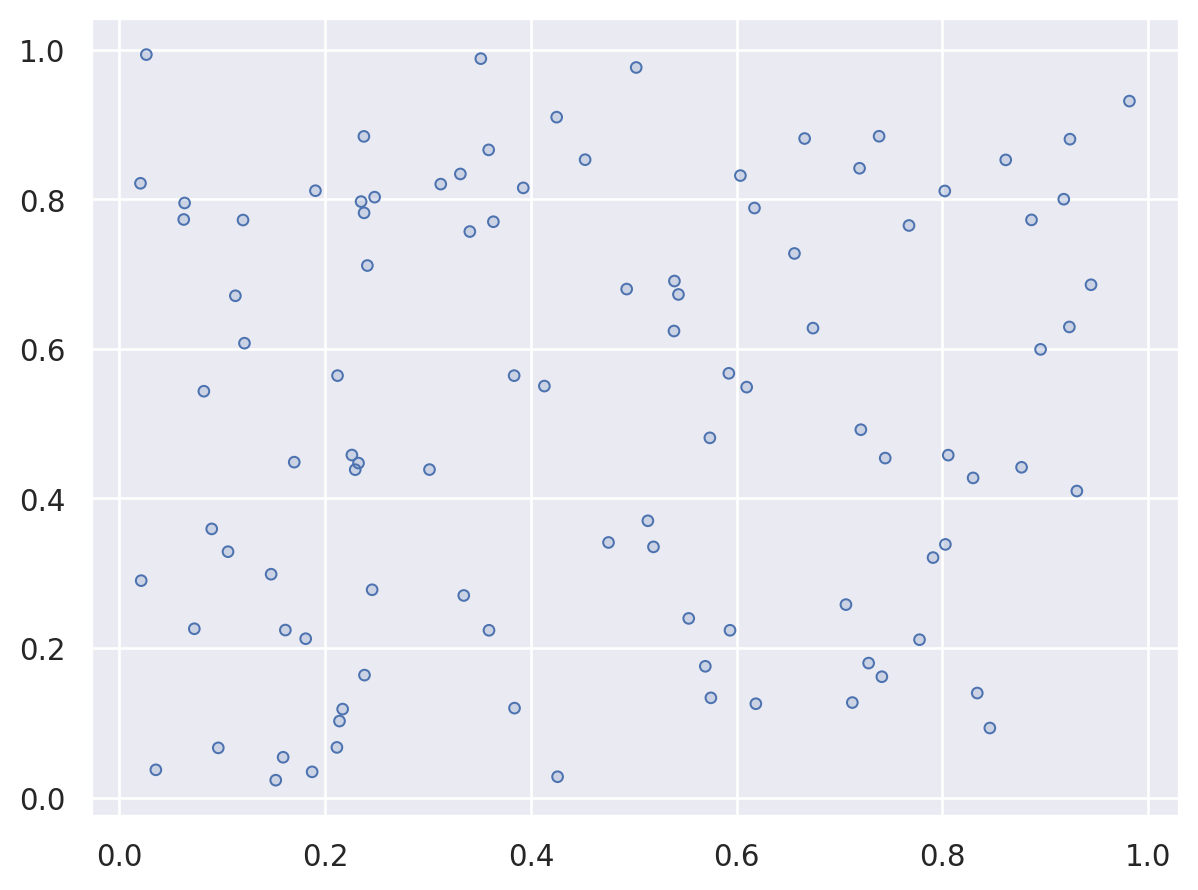

In [ ]:
import seaborn.objects as so

p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
#| export
@patch
def n_comp(self:RGG):
    def dfs(gr,s):
        for v in gr[s]:
            if v not in self.parent:
                self.parent[v]=s
                dfs(gr,v)
                self.topo.append(v)
    self.parent = {}
    self.topo=[]
    count = 0
    for i in range(self.n):
        if i not in self.parent:
            count+=1
            self.parent[i]=None
            dfs(self.adj,i)
            self.topo.append(i)
    return count


In [ ]:
rgg.n_comp()

18

In [ ]:
#| export
@patch
def degree_distribution(self: RGG):
    dgr=collections.Counter([len(v) for _,v in self.adj.items()])
    return np.array(list(dgr.items()))

In [ ]:
d_np = rgg.degree_distribution()
d_np

array([[ 2, 20],
       [ 1, 11],
       [ 4, 20],
       [ 6,  5],
       [ 5,  7],
       [ 9,  1],
       [ 3, 27],
       [ 7,  2],
       [ 0,  7]])

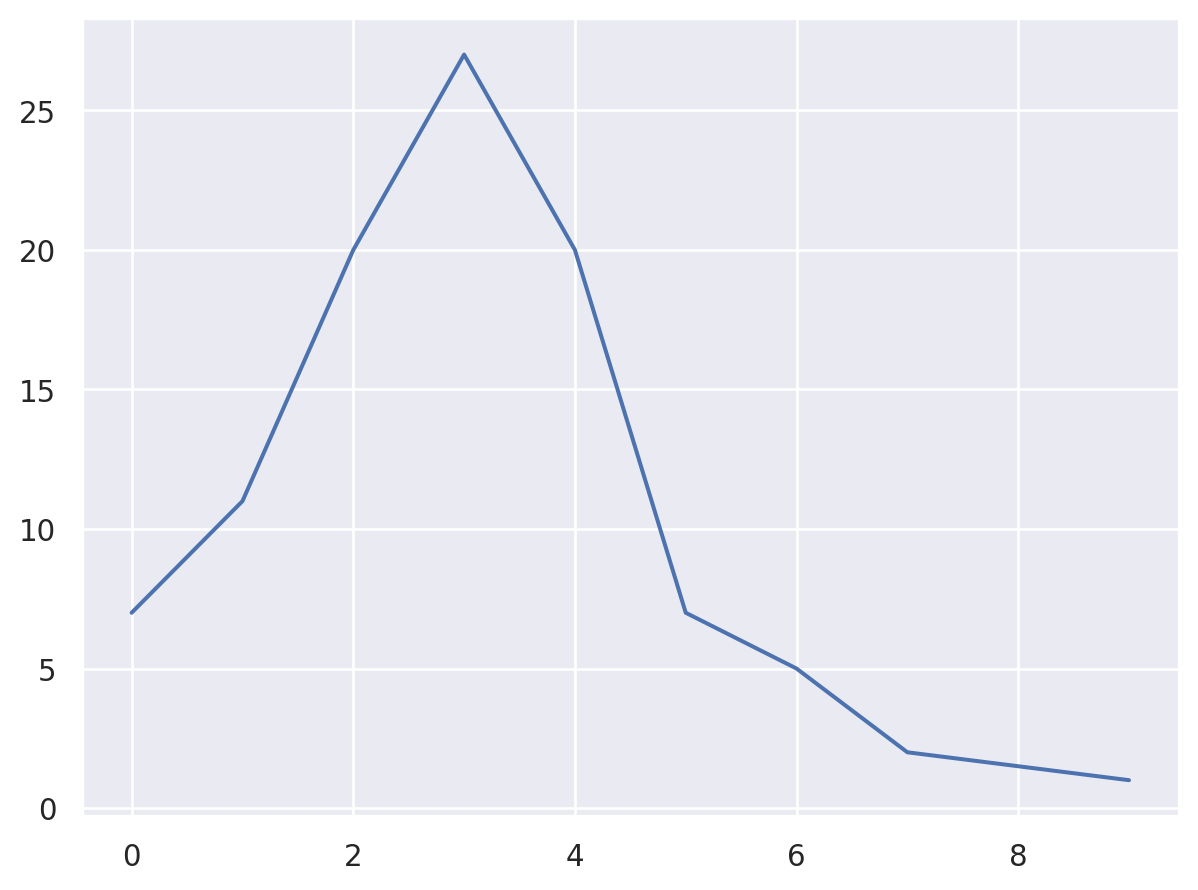

In [ ]:
(
    so.Plot(x=d_np[:,0], y=d_np[:,1])
    .add(so.Line())
)

In [ ]:
#| export
@patch
def cyclic(self:RGG):
    for k, lst in self.adj.items():
        for v in lst:
            if k != self.parent[v] and v!=self.parent[k]: 
                return True
    return False

In [ ]:
rgg.cyclic()

True

In [ ]:
#| export
@patch
def n_tri(self:RGG):
    A = (self.distance_matrix<=self.r).astype(np.int64)
    np.fill_diagonal(A,0)
    return np.trace(np.linalg.matrix_power(A,3))//6

In [ ]:
rgg.n_tri()

89

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()